In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

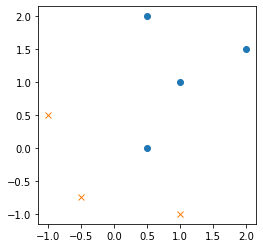

In [3]:
X_1 = np.array([[1,1],[2,1.5],[0.5,2],[0.5,0]])
# X_1 = np.array([[1,1],[2,1.5],[0.5,2]])
X_2 = np.array([[-1,0.5],[-0.5,-0.75,],[1,-1]])

fig = plt.figure()
ax = fig.gca()
plt.plot(X_1[:,0], X_1[:,1], 'o')
plt.plot(X_2[:,0], X_2[:,1], 'x')
ax.set_aspect('equal')

optimal
[-0.0625]
[0.15 0.2 ]
[-0.075]
[-0.05]
[0.1]


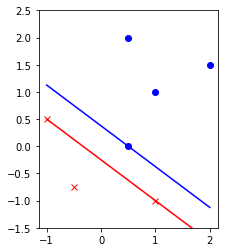

In [5]:
h_1 = cp.Variable(1)
h_2 = cp.Variable(1)
H = cp.Variable(2)

# cost = cp.abs(h_1 - h_2) - 0.001*cp.quad_form(H, np.eye(2))
# constr = []
# for i in range(X_1.shape[1]):
#     constr += [H*X_1[i] + h_1 <= 0]
#     constr += [H*X_2[i] + h_2 <= 0]    
# constr += [cp.power(h_1 - h_2, 2) - 0.01*cp.quad_form(H, np.eye(2)) >= 0]

cost = cp.quad_form(H, np.eye(2)) + h_1 + h_2
constr = []
for i in range(X_1.shape[0]):
    constr += [H*X_1[i] >= 0]
    constr += [H*X_1[i] + h_1 >= 0]
    constr += [-H*X_1[i] + h_2 <= 0]
for i in range(X_2.shape[0]):
    constr += [-H*X_2[i] >= 0]
    constr += [H*X_2[i] + h_1 <= 0]
    constr += [-H*X_2[i] + h_2 >= 0]
constr += [h_1 <= 0, h_2 <= 0]
# constr += [cp.power(h_1 - h_2, 2) - 0.01*cp.quad_form(H, np.eye(2)) >= 0]

problem = cp.Problem(cp.Minimize(cost), constr)
# problem.solve(solver=cp.MOSEK, verbose=False)
problem.solve(verbose=False)

print(problem.status)
print(cost.value)
print(H.value)
print(h_1.value)
print(h_2.value)

if np.linalg.norm(H.value) != 0:
    d = np.abs(h_1.value-h_2.value)/np.linalg.norm(H.value)
    print(d)

    x = np.linspace(-1, 2, 100)
    y_1 = (-H.value[0]*x-h_1.value)/H.value[1]
    y_2 = (H.value[0]*x-h_2.value)/(-H.value[1])

    fig = plt.figure()
    ax = fig.gca()
    plt.plot(X_1[:,0], X_1[:,1], 'bo')
    plt.plot(X_2[:,0], X_2[:,1], 'rx')
    plt.plot(x, y_1, 'b')
    plt.plot(x, y_2, 'r')
    ax.set_aspect('equal')
    ax.set_ylim([-1.5, 2.5])


[-0.09 -0.12]
[0.015]
[0.03]


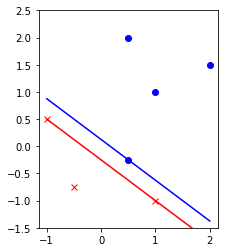

In [15]:
X_1 = np.array([[1,1],[2,1.5],[0.5,2],[0.5,-0.25]])
# X_1 = np.array([[1,1],[2,1.5],[0.5,2]])
X_2 = np.array([[-1,0.5],[-0.5,-0.75,],[1,-1]])
# X_2 = np.array([[-1,0.5],[-0.5,-0.75,],[1,-1],[1,0.5]])

h_1 = cp.Variable(1)
h_2 = cp.Variable(1)
H = cp.Variable(2)

# cost = cp.abs(h_1 - h_2) - 0.001*cp.quad_form(H, np.eye(2))
# constr = []
# for i in range(X_1.shape[1]):
#     constr += [H*X_1[i] + h_1 <= 0]
#     constr += [H*X_2[i] + h_2 <= 0]    
# constr += [cp.power(h_1 - h_2, 2) - 0.01*cp.quad_form(H, np.eye(2)) >= 0]

cost = cp.quad_form(H, np.eye(2)) - (h_1 + h_2)
constr = []
for i in range(X_1.shape[0]):
#     constr += [H*X_1[i] <= 0]
    constr += [H*X_1[i] + h_1 <= 0]
    constr += [-H*X_1[i] + h_2 >= 0]
for i in range(X_2.shape[0]):
#     constr += [-H*X_2[i] <= 0]
    constr += [H*X_2[i] + h_1 >= 0]
    constr += [-H*X_2[i] + h_2 <= 0]
constr += [h_1 >= 0, h_2 >= 0]
# constr += [cp.power(h_1 - h_2, 2) - 0.01*cp.quad_form(H, np.eye(2)) >= 0]

problem = cp.Problem(cp.Minimize(cost), constr)
# problem.solve(solver=cp.MOSEK, verbose=False)
problem.solve(verbose=False)

# print(problem.status)
# print(cost.value)
print(H.value)
print(h_1.value)
print(h_2.value)


# if np.linalg.norm(H.value) != 0:
if h_1.value >= 0 and h_2.value >= 0:
    d = np.abs(h_1.value-h_2.value)/np.linalg.norm(H.value)
#     print(d)

    x = np.linspace(-1, 2, 100)
    y_1 = (-H.value[0]*x-h_1.value)/H.value[1]
    y_2 = (H.value[0]*x-h_2.value)/(-H.value[1])

    fig = plt.figure()
    ax = fig.gca()
    plt.plot(X_1[:,0], X_1[:,1], 'bo')
    plt.plot(X_2[:,0], X_2[:,1], 'rx')
    plt.plot(x, y_1, 'b')
    plt.plot(x, y_2, 'r')
    ax.set_aspect('equal')
    ax.set_ylim([-1.5, 2.5])


In [ ]:
from scipy import linalg as sla
A = np.eye(2)
B = np.ones((2,3))
C = np.ones((3,3))
M = [A, B, C]
N = sla.block_diag(*M)
print(N)

In [ ]:
ss_t = range(10)
ss_n_it = [2,2,1,1,1,2,2,2,2,2]
ss_n_ts = [[10,10], [10,10], [7], [10], []]